In [1]:
import  pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df_planning = pd.read_csv("../data/planning_2021.csv")

In [4]:
df_tender = pd.read_csv("../data/tender_2021.csv")

c:\Users\jhony\miniconda3\envs\icd\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (12,13,14,15,16,18,19,20,22,23,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df_award = pd.read_csv("../data/awards_2021.csv")

c:\Users\jhony\miniconda3\envs\icd\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (4,6,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df_contract = pd.read_csv("../data/contracts_2021.csv")

In [7]:
res_tender = df_tender.loc[:, ["ocid", "procuringEntity_name", "procurementMethod", "value_amount"]]
res_award = df_award.loc[:, ["ocid", "status"]]
res1 = res_tender.merge(res_award, left_on="ocid", right_on="ocid", how="left")
res1

,ocid,procuringEntity_name,procurementMethod,value_amount,status
0,ocds-5wno2w-MCBS-DNA-003-2021-178618,DIRECCION NACIONAL DE ANTINARCOTICOS,selective,24706.08,NaN
1,ocds-5wno2w-CE-20210001957608-68478,GOBIERNO AUTONOMO DESCENTRALIZADO PROVINCIAL D...,selective,174.72,active
2,ocds-5wno2w-CE-20210001957610-68478,GOBIERNO AUTONOMO DESCENTRALIZADO PROVINCIAL D...,selective,90.72,active
3,ocds-5wno2w-CE-20210001988613-129424,DIRECCION DISTRITAL 12D04 - QUINSALOMA - VENTA...,selective,916.61,active
4,ocds-5wno2w-CE-20210002013013-68478,GOBIERNO AUTONOMO DESCENTRALIZADO PROVINCIAL D...,selective,80.81,active
...,...,...,...,...,...
163225,ocds-5wno2w-CE-20210002114419-2541,MINISTERIO DE AGRICULTURA Y GANADERÍA,selective,18.98,active
163226,ocds-5wno2w-MCBS-DNA-005-2021-178618,DIRECCION NACIONAL DE ANTINARCOTICOS,selective,28823.77,NaN
163227,ocds-5wno2w-MCS-CCFFAA-002-ABR21-2539,COMANDO CONJUNTO,selective,7589.29,NaN
163228,ocds-5wno2w-RE-GADMCN-17-21-LRG-67188,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,direct,30590.89,NaN


In [8]:
res1 = res1[(res1["status"] == "active")]
res1

,ocid,procuringEntity_name,procurementMethod,value_amount,status
1,ocds-5wno2w-CE-20210001957608-68478,GOBIERNO AUTONOMO DESCENTRALIZADO PROVINCIAL D...,selective,174.72,active
2,ocds-5wno2w-CE-20210001957610-68478,GOBIERNO AUTONOMO DESCENTRALIZADO PROVINCIAL D...,selective,90.72,active
3,ocds-5wno2w-CE-20210001988613-129424,DIRECCION DISTRITAL 12D04 - QUINSALOMA - VENTA...,selective,916.61,active
4,ocds-5wno2w-CE-20210002013013-68478,GOBIERNO AUTONOMO DESCENTRALIZADO PROVINCIAL D...,selective,80.81,active
5,ocds-5wno2w-CE-20210002016366-2345,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,selective,12.54,active
...,...,...,...,...,...
163221,ocds-5wno2w-CE-20210002100406-2470,GOBIERNO PROVINCIAL DE LOJA,selective,39.20,active
163222,ocds-5wno2w-CE-20210002103139-74622,HOSPITAL GENERAL MANTA,selective,35350.16,active
163223,ocds-5wno2w-CE-20210002103140-74622,HOSPITAL GENERAL MANTA,selective,5309.65,active
163224,ocds-5wno2w-CE-20210002112836-462114,EMPRESA ELÉCTRICA PÚBLICA ESTRATÉGICA CORPORAC...,selective,10012.80,active


In [9]:
def competitive(x):
    if (x == "direct"):
        return "No competitive"
    return "Competitive"

In [10]:
res1["procurementMethod"] = res1["procurementMethod"].apply(competitive)
res1

c:\Users\jhony\miniconda3\envs\icd\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ocid,procuringEntity_name,procurementMethod,value_amount,status
1,ocds-5wno2w-CE-20210001957608-68478,GOBIERNO AUTONOMO DESCENTRALIZADO PROVINCIAL D...,Competitive,174.72,active
2,ocds-5wno2w-CE-20210001957610-68478,GOBIERNO AUTONOMO DESCENTRALIZADO PROVINCIAL D...,Competitive,90.72,active
3,ocds-5wno2w-CE-20210001988613-129424,DIRECCION DISTRITAL 12D04 - QUINSALOMA - VENTA...,Competitive,916.61,active
4,ocds-5wno2w-CE-20210002013013-68478,GOBIERNO AUTONOMO DESCENTRALIZADO PROVINCIAL D...,Competitive,80.81,active
5,ocds-5wno2w-CE-20210002016366-2345,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,Competitive,12.54,active
...,...,...,...,...,...
163221,ocds-5wno2w-CE-20210002100406-2470,GOBIERNO PROVINCIAL DE LOJA,Competitive,39.20,active
163222,ocds-5wno2w-CE-20210002103139-74622,HOSPITAL GENERAL MANTA,Competitive,35350.16,active
163223,ocds-5wno2w-CE-20210002103140-74622,HOSPITAL GENERAL MANTA,Competitive,5309.65,active
163224,ocds-5wno2w-CE-20210002112836-462114,EMPRESA ELÉCTRICA PÚBLICA ESTRATÉGICA CORPORAC...,Competitive,10012.80,active


In [11]:
res1 = res1.groupby(["procuringEntity_name", "procurementMethod"])["ocid"].count().reset_index()
res1["total_procesos"] = res1.groupby("procuringEntity_name")["ocid"].transform("sum")
res1.columns = ["Licitante", "Metodo", "Cantidad", "Total"]
res1 = res1[~(res1["Cantidad"] == res1["Total"])]
res1["Porcentaje"] = res1["Cantidad"] / res1["Total"]
res1 = res1[(res1["Metodo"] == "No competitive") & (res1["Porcentaje"] > 0.75)]
res1.reset_index(drop=True)

,Licitante,Metodo,Cantidad,Total,Porcentaje
0,CENTRO CLINICO QUIRURGICO AMBULATORIO (HOSPITA...,No competitive,62,73,0.85
1,CENTRO CLINICO QUIRURGICO AMBULATORIO (HOSPITA...,No competitive,40,44,0.91
2,CENTRO CLINICO QUIRURGICO AMBULATORIO HOSPITAL...,No competitive,32,42,0.76
3,CENTRO DE ESPECIALIDADES BALZAR,No competitive,23,24,0.96
4,CENTRO DE SALUD A - LOS ESTEROS,No competitive,45,46,0.98
...,...,...,...,...,...
64,MINISTERIO DE GOBIERNO,No competitive,17,18,0.94
65,MINISTERIO DEL INTERIOR HOSPITAL DE LA POLICIA...,No competitive,55,62,0.89
66,MUNICIPIO DE MILAGRO,No competitive,14,15,0.93
67,Municipalidad de Guayaquil,No competitive,89,98,0.91


In [12]:
def filtrar(x: str):
    x = x.upper()
    if x.startswith("CENTRO CLINICO"):
        return "CENTRO CLINICO"
    if x.startswith("HOSPITAL"):
        return "HOSPITAL"
    if x.startswith("GOBIERNO AUTONOMO"):
        return "GOBIERNO AUTONOMO"
    if x.startswith("DIRECCION DISTRITAL"):
        return "DIRECCION DISTRITAL"
    if x.startswith("CENTRO DE SALUD"):
        return "CENTRO DE SALUD"
    if x.startswith("MINISTERIO"):
        return "MINISTERIO"
    return x

In [13]:
res1["Licitante"] = res1["Licitante"].apply(filtrar)
res1 = res1.groupby("Licitante").agg({"Porcentaje": ["mean", "count"]})
res1.columns = res1.columns.droplevel()
res1.columns = ["Porcentaje", "Frecuencia"]
res1.sort_values("Frecuencia", ascending=False)

,Porcentaje,Frecuencia
Licitante,,
HOSPITAL,0.89,31
DIRECCION DISTRITAL,0.88,11
GOBIERNO AUTONOMO,0.86,6
CENTRO DE SALUD,0.90,5
CENTRO CLINICO,0.84,3
MINISTERIO,0.92,2
MUNICIPIO DE MILAGRO,0.93,1
MUNICIPALIDAD DE GUAYAQUIL,0.91,1
IESS HOSPITAL DE CHONE,0.89,1


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontweight or weight: {a

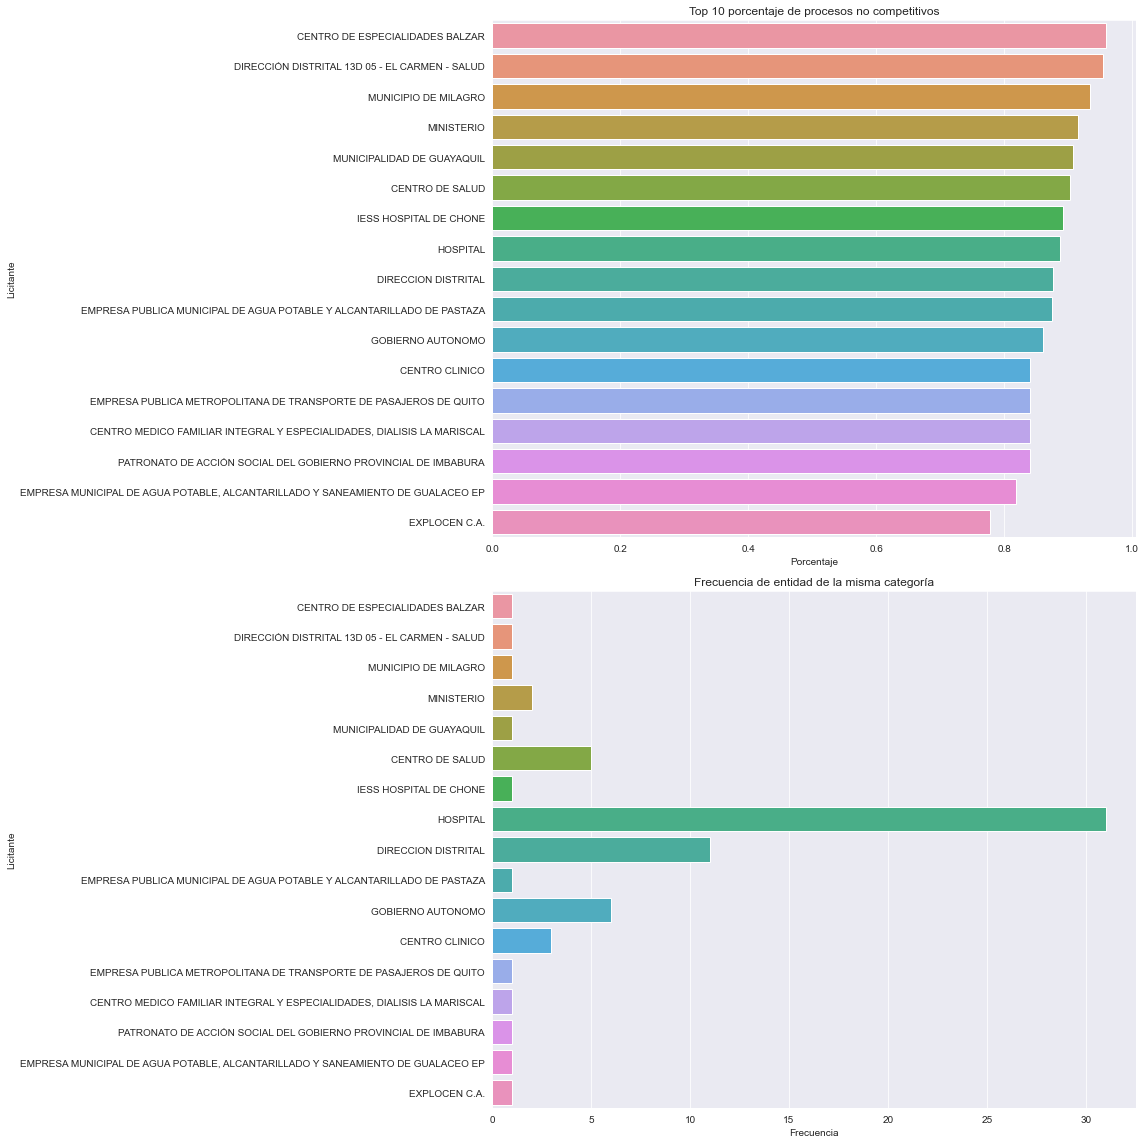

In [29]:
dib1 = res1.sort_values("Porcentaje", ascending=False)
dib2 = res1.sort_values("Frecuencia", ascending=False)
sbn.set_style("darkgrid")
fig,axs = plt.subplots(2,1,figsize=(16,16))
sbn.barplot(data=dib1, x="Porcentaje", y=dib1.index, ax=axs[0])
sbn.barplot(data=dib2, x="Frecuencia", y=dib2.index, ax=axs[1])
_ = plt.setp(axs[0].set_title("Top 10 porcentaje de procesos no competitivos"))
_ = plt.setp(axs[1].set_title("Frecuencia de entidad de la misma categoría"))
fig.tight_layout()
plt.savefig("../output/redflag-jhony1.jpg")

In [15]:
res2_tender = df_tender[["ocid", "procuringEntity_name"]]
res2_award = df_award[["ocid", "id", "amount",]]
res2_contract = df_contract[["ocid", "id", "amount"]]

In [16]:
res2 = res2_award.merge(res2_contract, left_on="ocid", right_on="ocid", how="left", suffixes=("_aw", "_ctr"))
res2 = res2[~(res2["amount_ctr"].isnull()) & ~(res2["amount_aw"].isnull())]
res2 = res2.merge(res2_tender, left_on="ocid", right_on="ocid", how="left")

In [17]:
res2["diferencia_absoluta"] = np.abs(res2["amount_aw"] - res2["amount_ctr"])
res2["diferencia_relativa"] = res2["diferencia_absoluta"] / res2["amount_aw"]
res2.head()

,ocid,id_aw,amount_aw,id_ctr,amount_ctr,procuringEntity_name,diferencia_absoluta,diferencia_relativa
0,ocds-5wno2w-MCBS-DNA-003-2021-178618,4726509-MCBS-DNA-003-2021,24706.08,2115897-MCBS-DNA-003-2021,24706.08,DIRECCION NACIONAL DE ANTINARCOTICOS,0.00,0.00
1,ocds-5wno2w-LCC-GADMQ-001-2021-2453,5031904-LCC-GADMQ-001-2021,258933.74,2092647-LCC-GADMQ-001-2021,258933.74,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,0.00,0.00
2,ocds-5wno2w-SIE-DNA-003-2021-178618,1763312-SIE-DNA-003-2021,11209.11,2115931-SIE-DNA-003-2021,11209.11,DIRECCION NACIONAL DE ANTINARCOTICOS,0.00,0.00
3,ocds-5wno2w-SIE-GADMCA-20-2021-3680,1804134-SIE-GADMCA-20-2021,173720.00,2086901-SIE-GADMCA-20-2021,173720.00,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,0.00,0.00
4,ocds-5wno2w-SIE-UNIAD-2021-003-R-270725,1749595-SIE-UNIAD-2021-003-R,25882.36,2071544-SIE-UNIAD-2021-003-R,25882.36,MINISTERIO DE GOBIERNO UNIDAD NACIONAL DE INVE...,0.00,0.00


In [18]:
res2 = res2[(res2["diferencia_relativa"] > 0) & (res2["diferencia_relativa"] <= 0.8)]
res2 = res2.groupby("procuringEntity_name").agg({"diferencia_relativa" : "mean", "diferencia_absoluta" : "mean"}).reset_index()
res2.head()

,procuringEntity_name,diferencia_relativa,diferencia_absoluta
0,ASOCIACIÒN DE PRODUCCIÒN AGROPECUARIA FINQUERI...,0.56,1630.62
1,"BATALLON DE INFANTERIA NRO 20 ""CAPITAN DIAZ""",0.36,165.60
2,BATALLON DE INFANTERIA No. 21 MACARA,0.73,1332.00
3,BENEMERITO CUERPO DE BOMBEROS DE GUAYAQUIL,0.37,1720.42
4,"BRIGADA DE CABALLERIA BLINDADA No. 11 ""GALÁPAGOS""",0.40,95.26


In [19]:
res2.columns = ["Licitante", "Diferencia relativa", "Diferencia absoluta"]
res2["Licitante"] = res2["Licitante"].str.upper().str[:60] + "..."
res2.head()

,Licitante,Diferencia relativa,Diferencia absoluta
0,ASOCIACIÒN DE PRODUCCIÒN AGROPECUARIA FINQUERI...,0.56,1630.62
1,"BATALLON DE INFANTERIA NRO 20 ""CAPITAN DIAZ""...",0.36,165.60
2,BATALLON DE INFANTERIA NO. 21 MACARA...,0.73,1332.00
3,BENEMERITO CUERPO DE BOMBEROS DE GUAYAQUIL ...,0.37,1720.42
4,"BRIGADA DE CABALLERIA BLINDADA NO. 11 ""GALÁPAG...",0.40,95.26


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontweight or weight: {a

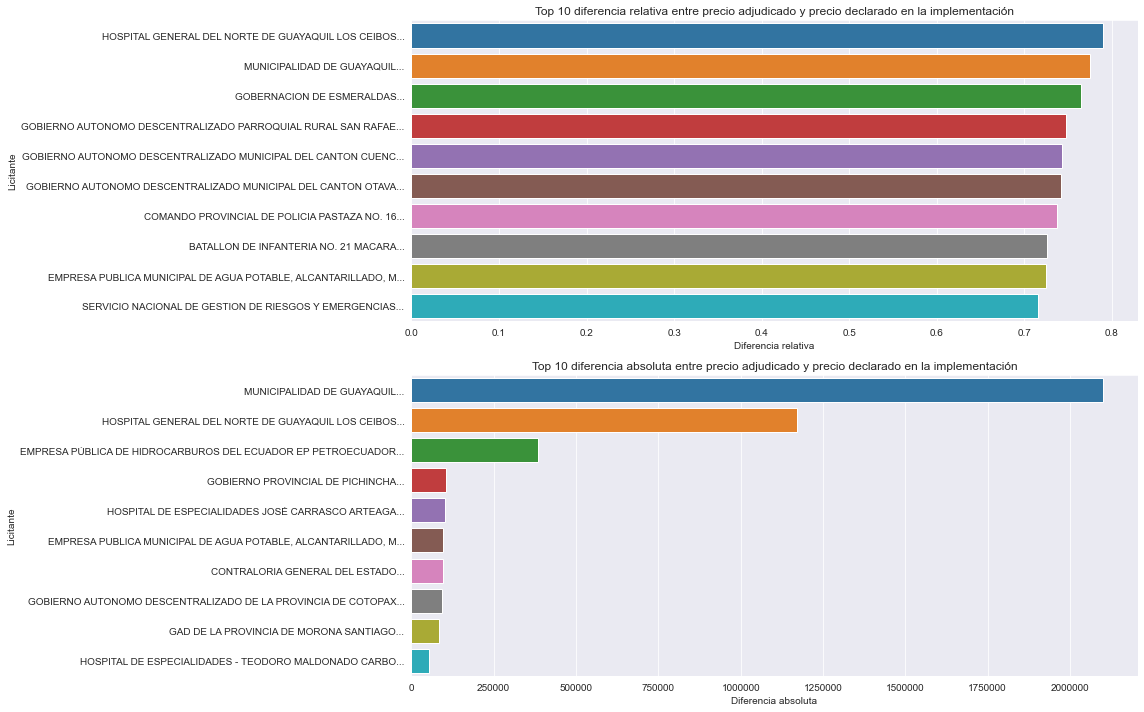

In [20]:
dib2_rel = res2.sort_values("Diferencia relativa", ascending=False)
dib2_abs = res2.sort_values("Diferencia absoluta", ascending=False)
sbn.set_style("darkgrid")
fig,axs = plt.subplots(2,1,figsize=(16,10))
sbn.barplot(data=dib2_rel[:10], x="Diferencia relativa", y="Licitante", ax=axs[0])
sbn.barplot(data=dib2_abs[:10], x="Diferencia absoluta", y="Licitante", ax=axs[1])
plt.setp(axs[0].set_title("Top 10 diferencia relativa entre precio adjudicado y precio declarado en la implementación"))
plt.setp(axs[1].set_title("Top 10 diferencia absoluta entre precio adjudicado y precio declarado en la implementación"))
axs[1].get_xaxis().get_major_formatter().set_scientific(False)
fig.tight_layout()
plt.savefig("../output/redflag-jhony2.jpg")

In [21]:
df_release = pd.read_csv("../data/releases_2021.csv")
df_supplier = pd.read_csv("../data/suppliers_2021.csv")

In [22]:
res3_tender = df_tender[["ocid", "procuringEntity_name", "value_amount", "procurementMethod"]]
res3_award = df_award[["ocid", "status", "id"]]
res3_supplier = df_supplier[["award_id", "name"]]
tmp = res3_award.merge(res3_supplier, left_on="id", right_on="award_id", how="left")
res3 = res3_tender.merge(tmp, left_on="ocid", right_on="ocid", how="left")
res3.head()

,ocid,procuringEntity_name,value_amount,procurementMethod,status,id,award_id,name
0,ocds-5wno2w-MCBS-DNA-003-2021-178618,DIRECCION NACIONAL DE ANTINARCOTICOS,24706.08,selective,NaN,4726509-MCBS-DNA-003-2021,4726509-MCBS-DNA-003-2021,SANTAMARIA MARFETAN JORGE VICENTE
1,ocds-5wno2w-CE-20210001957608-68478,GOBIERNO AUTONOMO DESCENTRALIZADO PROVINCIAL D...,174.72,selective,active,CE-20210001957608,CE-20210001957608,"CORPORACION ""M&M"" ""MEGASEO"" CIA.LTDA."
2,ocds-5wno2w-CE-20210001957610-68478,GOBIERNO AUTONOMO DESCENTRALIZADO PROVINCIAL D...,90.72,selective,active,CE-20210001957610,CE-20210001957610,"CORPORACION ""M&M"" ""MEGASEO"" CIA.LTDA."
3,ocds-5wno2w-CE-20210001988613-129424,DIRECCION DISTRITAL 12D04 - QUINSALOMA - VENTA...,916.61,selective,active,CE-20210001988613,CE-20210001988613,COMPAÑIA GENERAL DE COMERCIO COGECOMSA S. A.
4,ocds-5wno2w-CE-20210002013013-68478,GOBIERNO AUTONOMO DESCENTRALIZADO PROVINCIAL D...,80.81,selective,active,CE-20210002013013,CE-20210002013013,COMPAÑIA GENERAL DE COMERCIO COGECOMSA S. A.


In [23]:
def filtrar(row):
    porc = row["Porcentaje"]
    if porc < 0.1:
        row["Licitador"] = "OTROS"
    row["Licitante"] = row["Licitante"].upper()[:70]
    row["Licitador"] = row["Licitador"].upper()
    return row

In [24]:
result3 = res3.groupby(["procuringEntity_name", "name"])["id"].count().reset_index()
result3["total_procesos"] = result3.groupby(["procuringEntity_name"])["id"].transform("sum")
result3["unicos"] = result3.groupby(["procuringEntity_name"])["id"].transform("count")
result3["porcentaje"] = result3["id"] / result3["total_procesos"]
result3 = result3[(result3["total_procesos"] != result3["id"]) & (result3["unicos"] >= 25)]
filtro3 = result3.groupby(["procuringEntity_name"])["porcentaje"].transform("max") >= 0.6
result3 = result3[filtro3].reset_index(drop=True)
result3.columns = ["Licitante", "Licitador", "Cantidad", "Total", "Uniques", "Porcentaje"]
result3 = result3.apply(filtrar, axis=1)
result3.head()

,Licitante,Licitador,Cantidad,Total,Uniques,Porcentaje
0,AGENCIA DE REGULACION Y CONTROL DE LAS TELECOM...,OTROS,1,95,25,0.01
1,AGENCIA DE REGULACION Y CONTROL DE LAS TELECOM...,OTROS,1,95,25,0.01
2,AGENCIA DE REGULACION Y CONTROL DE LAS TELECOM...,OTROS,1,95,25,0.01
3,AGENCIA DE REGULACION Y CONTROL DE LAS TELECOM...,OTROS,1,95,25,0.01
4,AGENCIA DE REGULACION Y CONTROL DE LAS TELECOM...,OTROS,4,95,25,0.04


In [25]:
result3 = result3.groupby(["Licitante", "Licitador"])["Porcentaje"].sum().reset_index()
result3.head()

,Licitante,Licitador,Porcentaje
0,AGENCIA DE REGULACION Y CONTROL DE LAS TELECOM...,COMPAÑIA GENERAL DE COMERCIO COGECOMSA S. A.,0.61
1,AGENCIA DE REGULACION Y CONTROL DE LAS TELECOM...,OTROS,0.39
2,BASE NAVAL DE ESMERALDAS,COMPAÑIA GENERAL DE COMERCIO COGECOMSA S. A.,0.70
3,BASE NAVAL DE ESMERALDAS,OTROS,0.30
4,BRIGADA DE INFANTERIA NO 1 EL ORO,COMPAÑIA GENERAL DE COMERCIO COGECOMSA S. A.,0.60


In [26]:
result3.sort_values("Porcentaje", ascending=False).head()

,Licitante,Licitador,Porcentaje
37,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,COMPAÑIA GENERAL DE COMERCIO COGECOMSA S. A.,0.76
20,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,FERRETERIA BODEGA BLANCA S.A. BODEGABLA,0.73
6,CENTRO DE GESTIÓN Y DESARROLLO SOCIAL DEL GOBI...,COMPAÑIA GENERAL DE COMERCIO COGECOMSA S. A.,0.73
39,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL D...,COMPAÑIA GENERAL DE COMERCIO COGECOMSA S. A.,0.73
8,EMPRESA PUBLICA DE AGUA POTABLE Y ALCANTARILLA...,COMPAÑIA GENERAL DE COMERCIO COGECOMSA S. A.,0.71


In [27]:
dib3 = pd.pivot_table(result3, index="Licitante", columns="Licitador", fill_value=0)
dib3.columns = dib3.columns.droplevel()

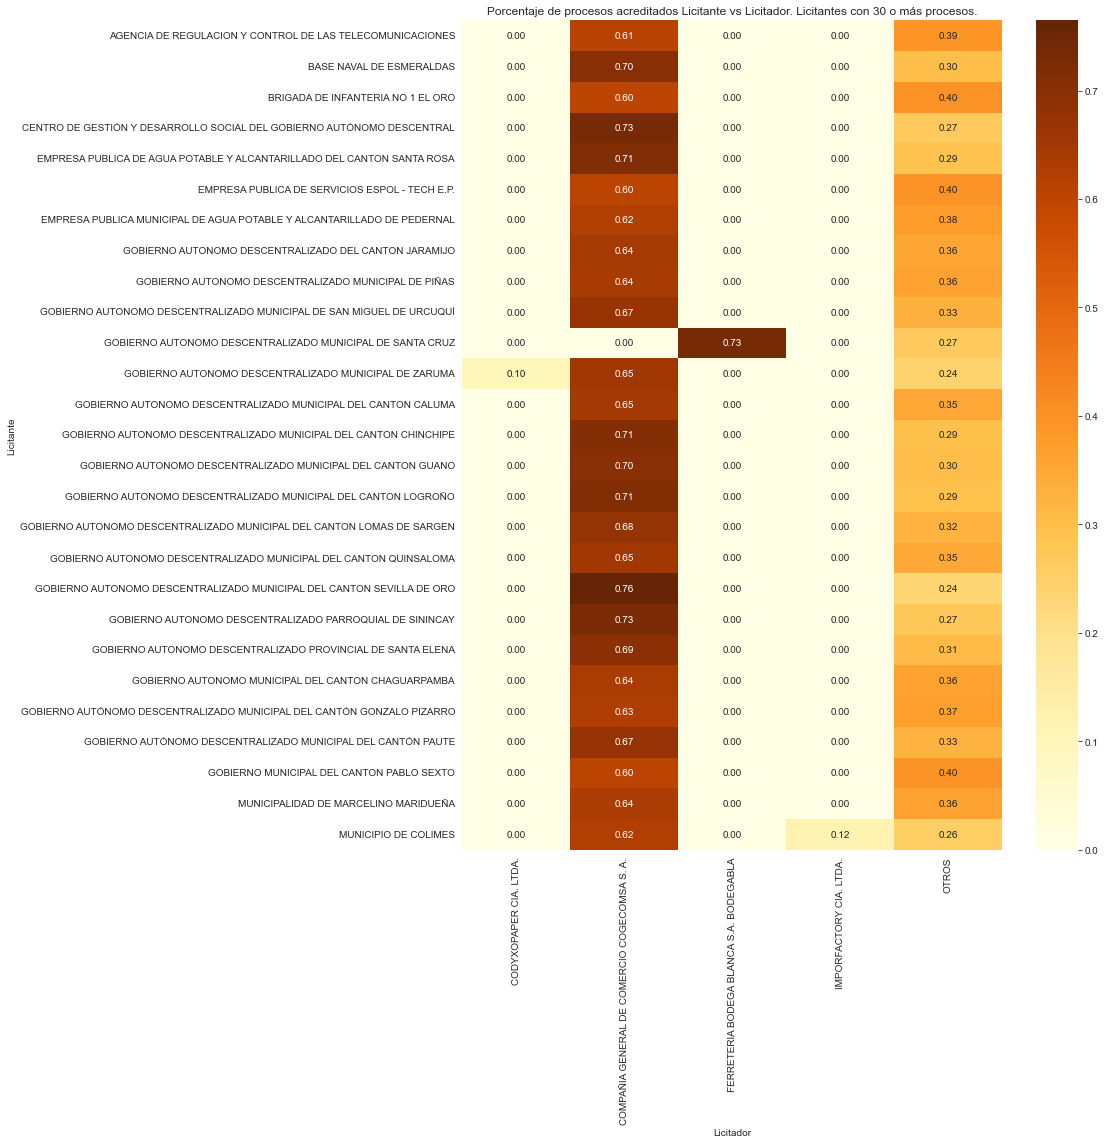

In [28]:
sbn.set_style("darkgrid")
fig, axs = plt.subplots(figsize=(16, 16))
_ = sbn.heatmap(dib3, yticklabels=dib3.index, xticklabels=dib3.columns,
                ax=axs, annot=True, fmt=".2f", cmap="YlOrBr")
axs.set_title(
    "Porcentaje de procesos acreditados Licitante vs Licitador. Licitantes con 30 o más procesos.")
_ = plt.yticks(rotation=0)
fig.tight_layout()
plt.savefig("../output/redflag-jhony3.jpg")